In [27]:
# Importing pandas and seaborn libraries for data manipulation and charting
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
# Import data from CSV file
data = pd.read_csv('churn_clean.csv')

In [29]:
# Function to clean column names

def column_name_remove_space(df):
    for x in df.columns:
        if " " in x:
            df = df.rename(columns={x:x.replace(" ","_").replace("(","")
                                    .replace(")","").replace(",","_").replace("/","_")})
    return df


In [30]:
# Renaming columns for the columns related to survey questions
data.rename(columns={'Item1':'Timely_response','Item2':'Timely_fixes','Item3':'Timely_replacements',
                     'Item4':'Reliability','Item5':'Options','Item6':'Respectful_response',
                     'Item7':'Courteous_exchange','Item8':'Evidence_of_active_listening'}, inplace=True)

In [31]:
# Check for null values
data.isna().any(axis=0).any()

False

In [32]:
# Checking number of unique values in each column
data.nunique()

CaseOrder                       10000
Customer_id                     10000
Interaction                     10000
UID                             10000
City                             6058
State                              52
County                           1620
Zip                              8583
Lat                              8563
Lng                              8630
Population                       5933
Area                                3
TimeZone                           25
Job                               639
Children                           11
Age                                72
Income                           9993
Marital                             5
Gender                              3
Churn                               2
Outage_sec_perweek               9986
Email                              23
Contacts                            8
Yearly_equip_failure                6
Techie                              2
Contract                            3
Port_modem  

In [33]:
# Check all the unique values for all the columns having less than 100 unique values
# Avoiding the value prints for those columns which have large number of unique values like zipcode or counties etc.

for col in data.columns:
    if data[col].nunique()<100:
        print(col, sorted(data[col].unique()), '\n')


State ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'] 

Area ['Rural', 'Suburban', 'Urban'] 

TimeZone ['America/Anchorage', 'America/Boise', 'America/Chicago', 'America/Denver', 'America/Detroit', 'America/Indiana/Indianapolis', 'America/Indiana/Knox', 'America/Indiana/Marengo', 'America/Indiana/Petersburg', 'America/Indiana/Tell_City', 'America/Indiana/Vincennes', 'America/Indiana/Winamac', 'America/Juneau', 'America/Kentucky/Louisville', 'America/Los_Angeles', 'America/Menominee', 'America/New_York', 'America/Nome', 'America/North_Dakota/New_Salem', 'America/Ojinaga', 'America/Phoenix', 'America/Puerto_Rico', 'America/Sitka', 'America/Toronto', 'Pacific/Honolulu'] 

Children [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 

Age [18, 19

In [34]:
# Following data columns are not important for data analysis (more details included in the report)
to_drop = ['City','County','Zip','Job','TimeZone',
          'Lat','Lng','UID', 'Customer_id','Interaction','CaseOrder']

In [35]:
# Fix all columns
data = column_name_remove_space(data)
data.drop(columns=to_drop,inplace=True)

In [36]:
# Check data by printing first few rows
data.head()

,State,Population,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,...,MonthlyCharge,Bandwidth_GB_Year,Timely_response,Timely_fixes,Timely_replacements,Reliability,Options,Respectful_response,Courteous_exchange,Evidence_of_active_listening
0,AK,38,Urban,0,68,28561.99,Widowed,Male,No,7.978323,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,MI,10446,Urban,1,27,21704.77,Married,Female,Yes,11.699080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,OR,3735,Urban,4,50,9609.57,Widowed,Female,No,10.752800,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,CA,13863,Suburban,1,48,18925.23,Married,Male,No,14.913540,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,TX,11352,Suburban,0,83,40074.19,Separated,Male,Yes,8.147417,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [37]:
# Check data by printing last few rows
data.tail()

,State,Population,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,...,MonthlyCharge,Bandwidth_GB_Year,Timely_response,Timely_fixes,Timely_replacements,Reliability,Options,Respectful_response,Courteous_exchange,Evidence_of_active_listening
9995,VT,640,Rural,3,23,55723.74,Married,Male,No,9.415935,...,159.9794,6511.252601,3,2,3,3,4,3,2,3
9996,TN,77168,Rural,4,48,34129.34,Divorced,Male,No,6.740547,...,207.4811,5695.951810,4,5,5,4,4,5,2,5
9997,TX,406,Rural,1,48,45983.43,Never Married,Female,No,6.590911,...,169.9741,4159.305799,4,4,4,4,4,4,4,5
9998,GA,35575,Urban,1,39,16667.58,Separated,Male,No,12.071910,...,252.6240,6468.456752,4,4,6,4,3,3,5,4
9999,GA,12230,Urban,1,28,9020.92,Never Married,Male,No,11.754720,...,217.4840,5857.586167,2,2,3,3,3,3,4,1


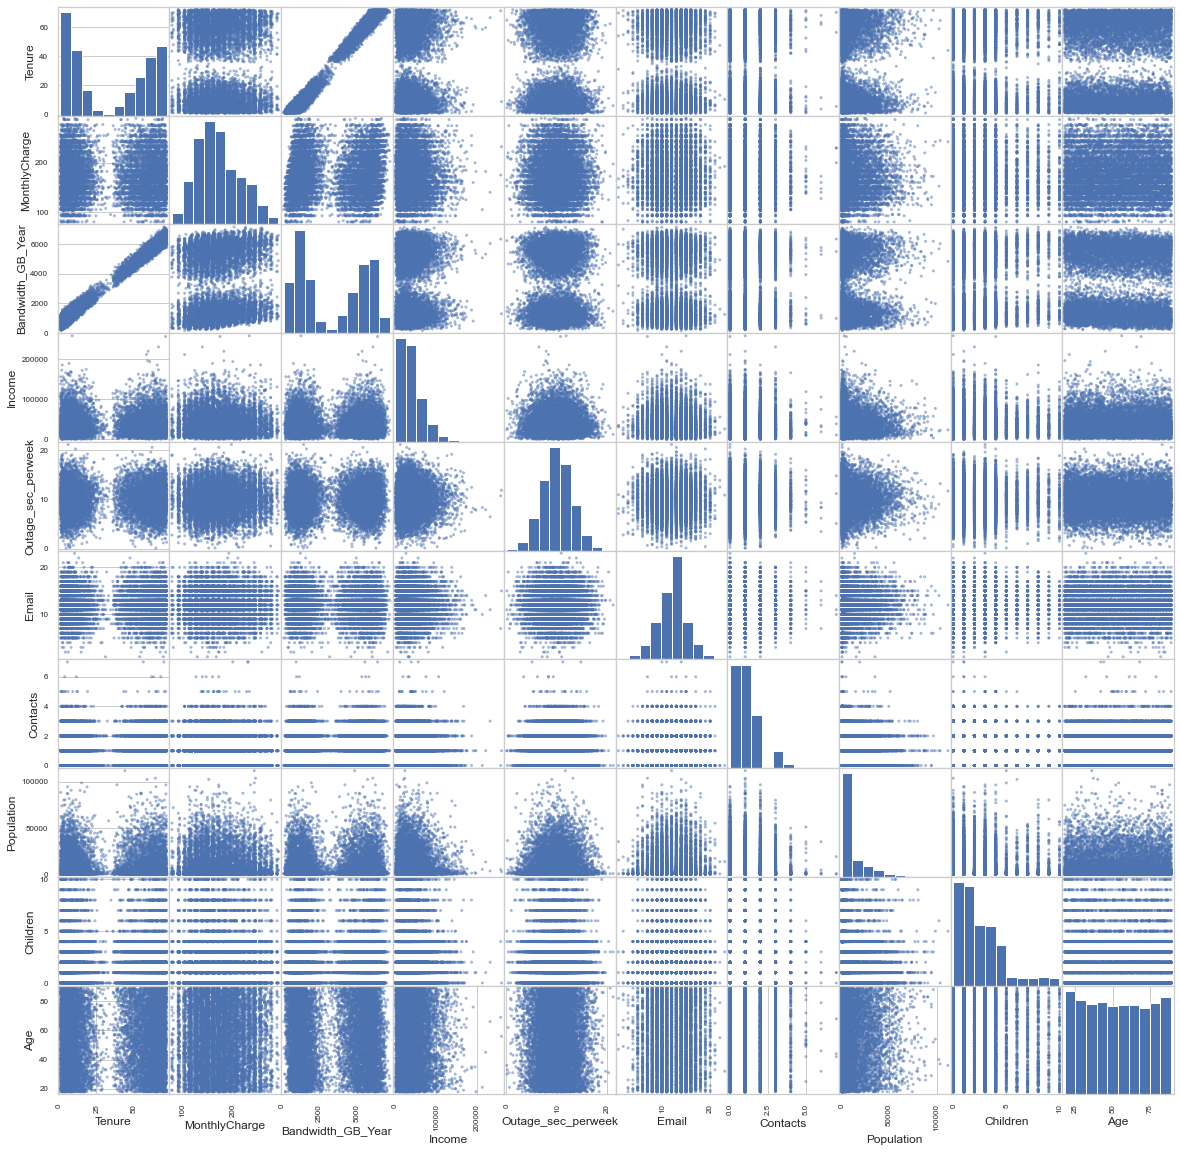

In [38]:
pd.plotting.scatter_matrix(data[['Tenure','MonthlyCharge','Bandwidth_GB_Year','Income','Outage_sec_perweek',
           'Email','Contacts','Population','Children','Age']], figsize=(20, 20))
plt.show()

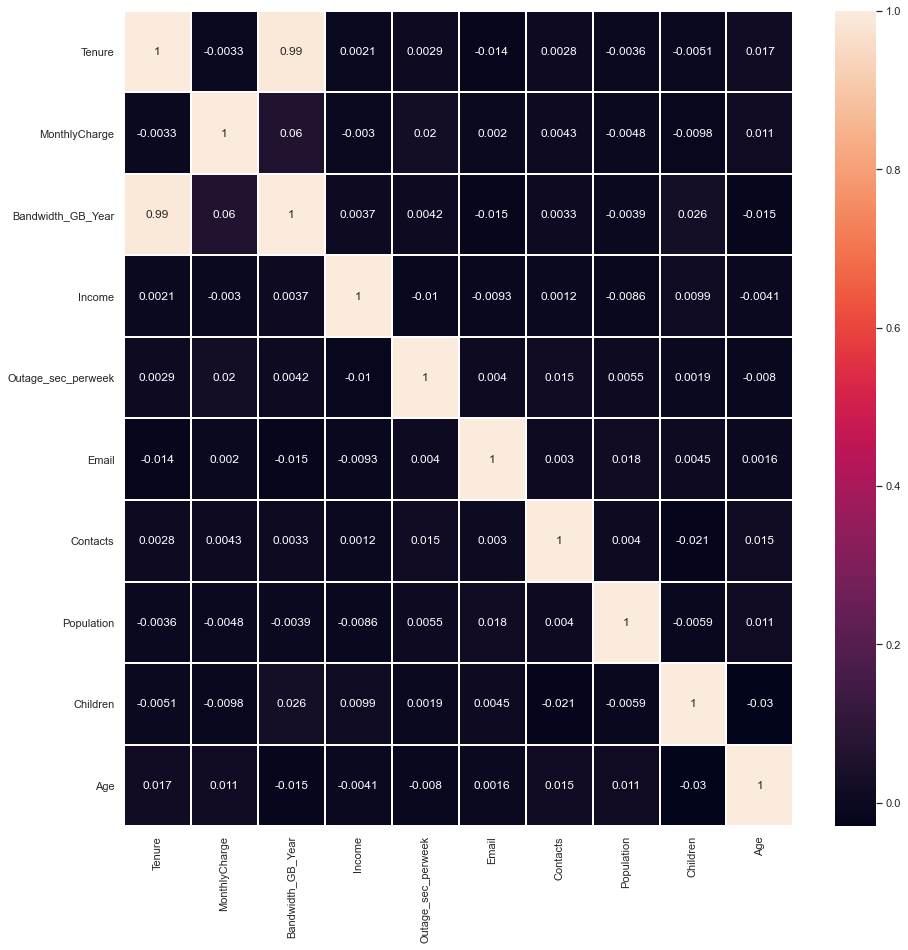

In [39]:
plt.subplots(figsize=(15,15))
df = data[['Tenure','MonthlyCharge','Bandwidth_GB_Year','Income','Outage_sec_perweek',
           'Email','Contacts','Population','Children','Age']]
sns.heatmap(df.corr(),annot=True,lw=1);

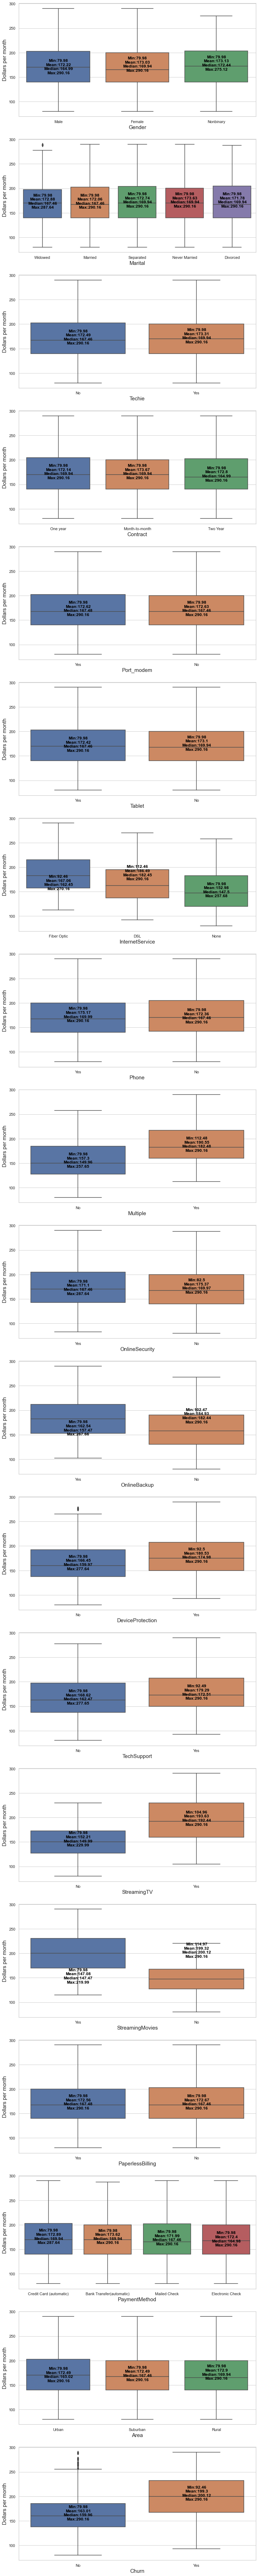

In [40]:
# Declaring all the columns which will be used for creation of box plots

to_plot = ['Gender','Marital','Techie','Contract','Port_modem',
           'Tablet','InternetService','Phone','Multiple','OnlineSecurity','OnlineBackup',
           'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
           'PaperlessBilling','PaymentMethod','Area', 'Churn']

# Creating box plots, with mean and median printed
sns.set(style="whitegrid")
fig, axes = plt.subplots(ncols=1, nrows = len(to_plot), figsize = (12,7*len(to_plot)))
i = 0
for x in to_plot:
    g = sns.boxplot(y='MonthlyCharge',x=x,data=data, ax=axes[i])
    g.set_xlabel(x,fontsize=15)
    g.set_ylabel("Dollars per month",fontsize=15)
    i += 1
    means = data.groupby(x)['MonthlyCharge'].mean()
    medians = data.groupby(x)['MonthlyCharge'].median()
    maxs = data.groupby(x)['MonthlyCharge'].max()
    mins = data.groupby(x)['MonthlyCharge'].min()
    vertical_offset = data['MonthlyCharge'].mean() *.05
    for xtick in g.get_xticks():
        mean_ = str(round(means[xtick],2))
        median_ = str(round(medians[xtick],2))
        max_ = str(round(maxs[xtick],2))
        min_ = str(round(mins[xtick],2))
        ypos = medians[xtick]-vertical_offset
        g.text(xtick,ypos,"Min:"+min_+'\nMean:'+mean_+
               "\nMedian:"+median_+"\nMax:"+max_, horizontalalignment='center', 
               color='black', weight='semibold')


plt.show(fig)

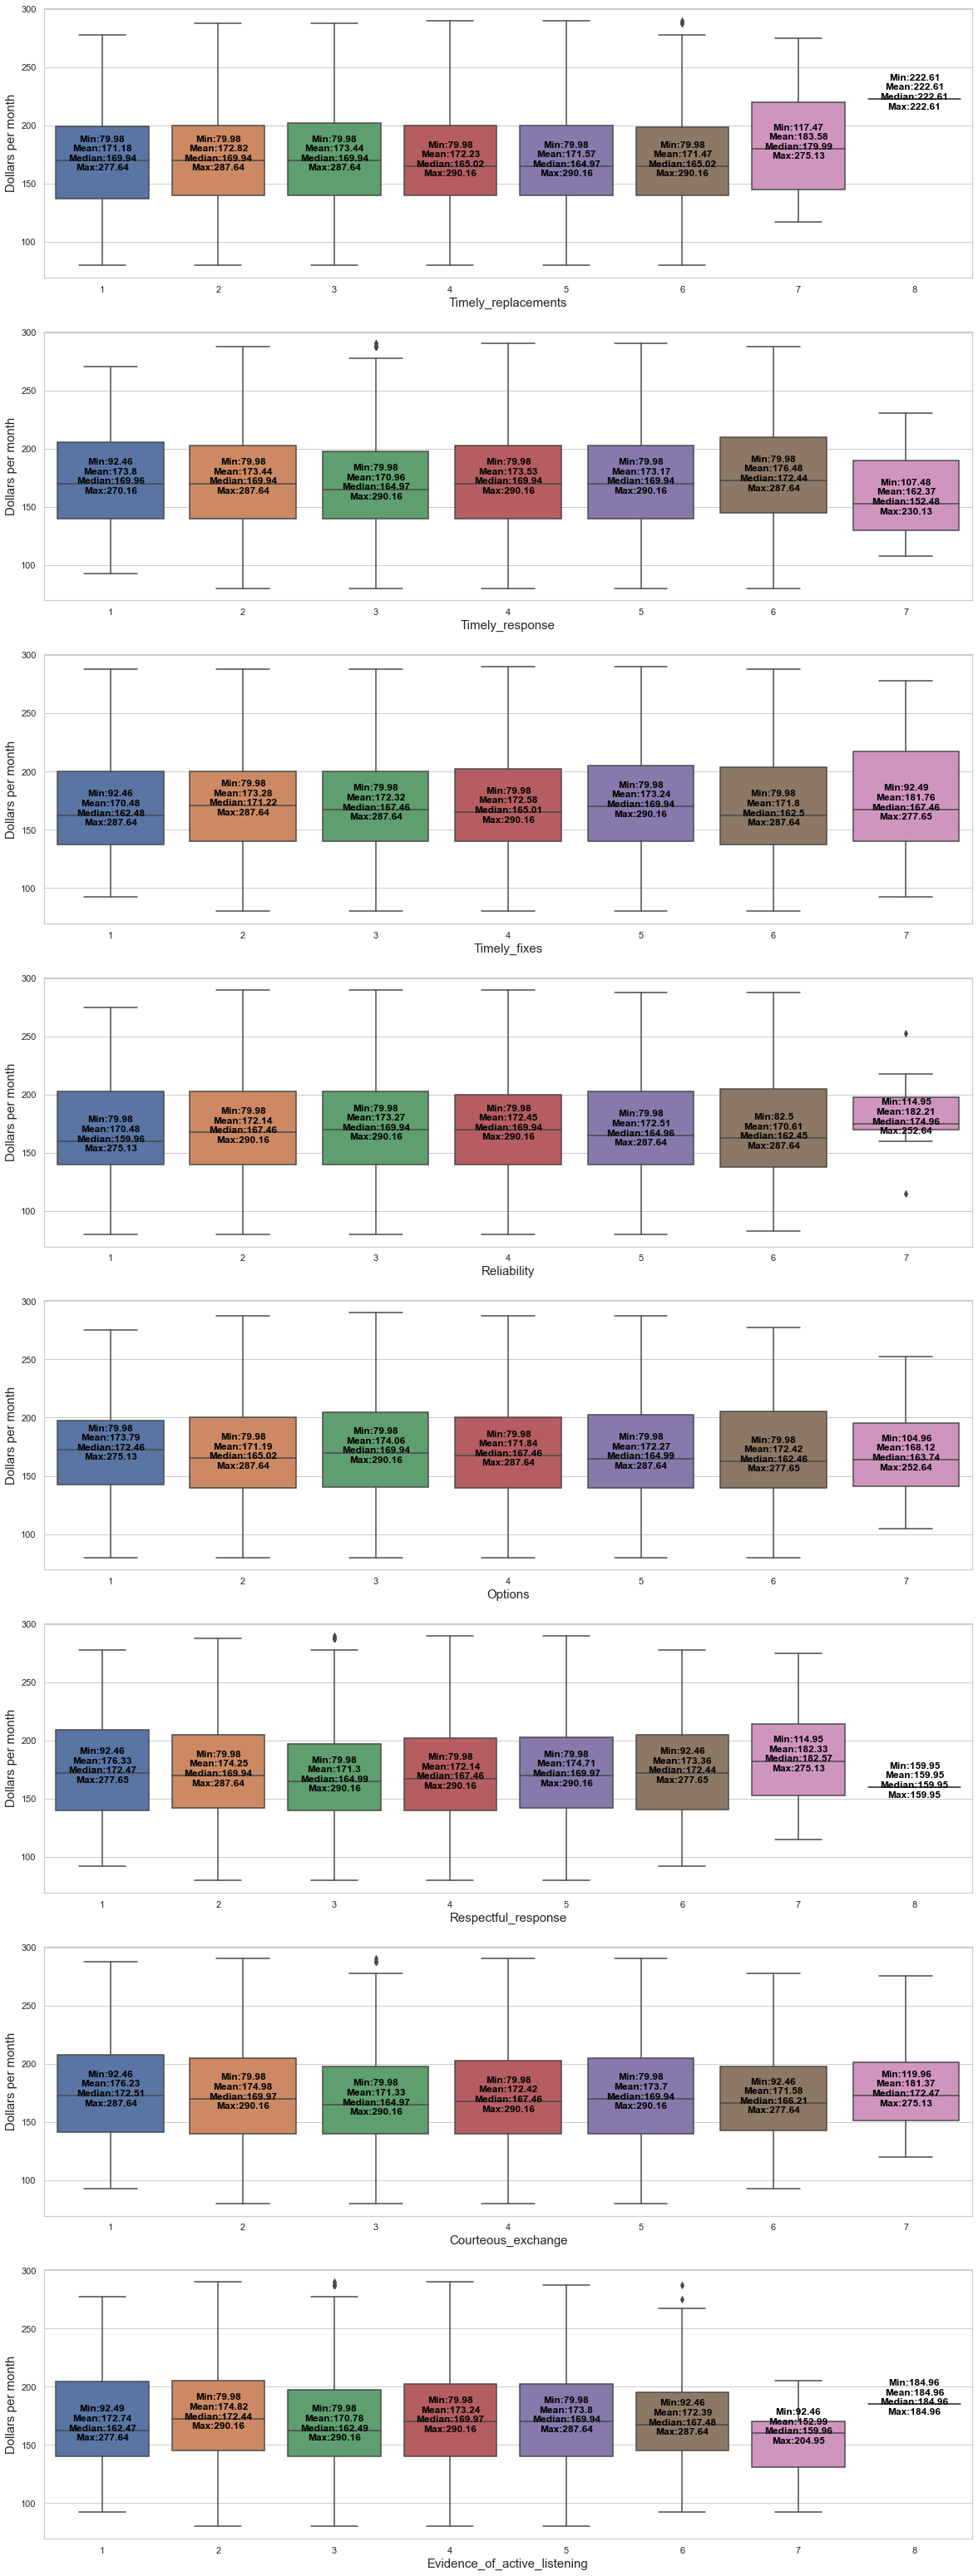

In [41]:
# Declaring all the columns which will be used for creation of box plots

to_plot = ['Timely_replacements','Timely_response','Timely_fixes','Reliability','Options',
                'Respectful_response','Courteous_exchange','Evidence_of_active_listening']

# Creating box plots, with mean and median printed
sns.set(style="whitegrid")
fig, axes = plt.subplots(ncols=1, nrows = len(to_plot), figsize = (20,7*len(to_plot)))
i = 0
for x in to_plot:
    g = sns.boxplot(y='MonthlyCharge',x=x,data=data, ax=axes[i])
    g.set_xlabel(x,fontsize=15)
    g.set_ylabel("Dollars per month",fontsize=15)
    i += 1
    means = data.groupby(x)['MonthlyCharge'].mean()
    medians = data.groupby(x)['MonthlyCharge'].median()
    maxs = data.groupby(x)['MonthlyCharge'].max()
    mins = data.groupby(x)['MonthlyCharge'].min()
    vertical_offset = data['MonthlyCharge'].mean() *.05
    for xtick in g.get_xticks():
        xtick = xtick + 1
        mean_ = str(round(means[xtick],2))
        median_ = str(round(medians[xtick],2))
        max_ = str(round(maxs[xtick],2))
        min_ = str(round(mins[xtick],2))
        ypos = medians[xtick]-vertical_offset
        g.text(xtick-1,ypos,"Min:"+min_+'\nMean:'+mean_+
               "\nMedian:"+median_+"\nMax:"+max_, horizontalalignment='center', 
               color='black', weight='semibold')


plt.show(fig)

In [42]:
# Following columns have categorical data types and they need to be converted to dummy variables
dummy_variable_columns = ['State',
                          'Churn','Area','Marital','Gender','Techie','Contract','Port_modem','Tablet',
                         'InternetService','Phone', 'Multiple','OnlineSecurity','OnlineBackup',
                          'DeviceProtection','TechSupport', 'StreamingTV','StreamingMovies',
                          'PaperlessBilling','PaymentMethod'
                         ]


# Following columns have continuous numerical data, which needs to be scaled before predictive model can be created.
# Hence, these columns will be transformed to normalized form.

to_transform = ['Population','Children','Age','Income','Outage_sec_perweek','Email',
                'Contacts','Yearly_equip_failure','Tenure',
                'MonthlyCharge','Bandwidth_GB_Year',
                'Timely_response','Timely_fixes','Timely_replacements',
                'Reliability','Options',
                'Respectful_response','Courteous_exchange',
                'Evidence_of_active_listening'
               ]

dummy_data_file_index = 0

In [43]:
from sklearn.preprocessing import StandardScaler

def get_dummy_data_with_output(dummy_variable_columns, data):
    global dummy_data_file_index
    dummy_data = pd.get_dummies(data, prefix=dummy_variable_columns, columns=dummy_variable_columns, drop_first= True)
    dummy_data = column_name_remove_space(dummy_data)
    dummy_data.to_csv('dummy_var_data'+str(dummy_data_file_index)+'.csv', index=False)
    y = dummy_data['MonthlyCharge']
    dummy_data.drop(columns=['MonthlyCharge'], inplace=True)
    dummy_data_file_index += 1
    return y, dummy_data

y, dummy_data = get_dummy_data_with_output(dummy_variable_columns, data)

In [44]:
# Starting with imports
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


In [45]:
# Split the training and test set 7:3 
X_train, X_test, y_train, y_test = train_test_split(dummy_data,y,test_size=.3, random_state=0)

In [46]:
# Creating a function to create prediction model based on statsmodel library and
# print details like model Summary, Confusion Matrix and Accuracy Score based on predicted values using test set
figsize=(8,5)

def get_sm_model(y_train,X_train, X_test):
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)
    model=sm.OLS(y_train,X_train)
    model=model.fit()
    print(model.summary())
    y_hat = model.predict(X_test)
    arr = np.c_[y_hat, y_test]
    print('\nPrinting predicted and actual values:\n',arr)
    print('\nPrinting Mean Squared Error:\n',(np.sqrt(mean_squared_error(y_test, y_hat))))
    print('\nR2 Score:\n',r2_score(y_test, y_hat))
    fix, ax = plt.subplots(figsize=figsize)
    g = sns.regplot(y=y_test,x=y_hat, ax = ax)
    g.set_xlabel("Predictions",fontsize=15)
    g.set_ylabel("Test",fontsize=15)
    plt.show()
    return model, arr

# Creating a function to create prediction model based on sklearn library and
# print details like model Summary, Confusion Matrix and Accuracy Score based on predicted values using test set

def get_sk_model(y_train,X_train, X_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    arr = np.c_[X_train.columns.tolist(),model.coef_]
    intercept = model.intercept_
    print('\nPrinting model coefficients and intercept summary for sklearn model:\n',arr, model.intercept_)
    y_pred = model.predict(X_test)
    print('\nPrinting predicted and actual values from sklearn:\n',np.c_[y_pred, y_test])
    print('\nPrinting Mean Squared Error from sklearn:\n',(np.sqrt(mean_squared_error(y_test, y_pred))))
    print('\nR2 Score  from sklearn:\n',r2_score(y_test, y_pred))
    fix, ax = plt.subplots(figsize=figsize)
    g = sns.regplot(y=y_test,x=y_pred,color="g", ax = ax)
    g.set_xlabel("Predictions",fontsize=15)
    g.set_ylabel("Test",fontsize=15)
    plt.show()
    #plt.scatter(y_pred,y_test-y_pred)
    fix, ax = plt.subplots(figsize=figsize)
    g = sns.regplot(x=y_pred,y=y_test-y_pred,color="red", ax = ax)
    g.set_xlabel("Predictions",fontsize=15)
    g.set_ylabel("Residual",fontsize=15)
    plt.show()
    return model, arr, intercept


                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.592e+04
Date:                Wed, 13 Jan 2021   Prob (F-statistic):               0.00
Time:                        00:17:38   Log-Likelihood:                -17300.
No. Observations:                7000   AIC:                         3.480e+04
Df Residuals:                    6902   BIC:                         3.547e+04
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

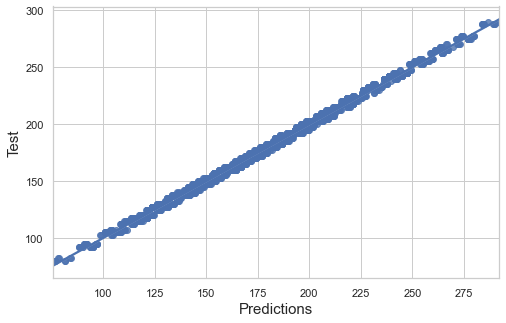


Printing model coefficients and intercept summary for sklearn model:
 [['Population' '-3.209672820750057e-06']
 ['Children' '-9.521140121793575']
 ['Age' '1.0143726968882552']
 ['Income' '-1.7881875424841098e-07']
 ['Outage_sec_perweek' '0.012467532350801003']
 ['Email' '0.006078524023126697']
 ['Contacts' '-0.040225463206245315']
 ['Yearly_equip_failure' '0.00993713896209536']
 ['Tenure' '-25.358555715548732']
 ['Bandwidth_GB_Year' '0.3095367759882812']
 ['Timely_response' '0.10205368136123383']
 ['Timely_fixes' '-0.038481816615815845']
 ['Timely_replacements' '0.036545505126317046']
 ['Reliability' '0.02651386272252143']
 ['Options' '-0.01715988528552348']
 ['Respectful_response' '-0.029830570021488256']
 ['Courteous_exchange' '-0.012011936616233676']
 ['Evidence_of_active_listening' '-0.005780983209111135']
 ['State_AL' '0.5463468022066547']
 ['State_AR' '0.7215857266792778']
 ['State_AZ' '0.5446946476201489']
 ['State_CA' '0.37206615518464137']
 ['State_CO' '0.2575024793921763']
 

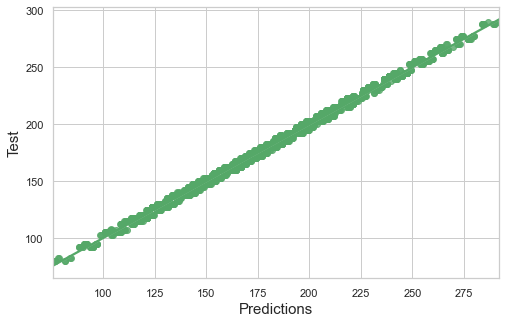

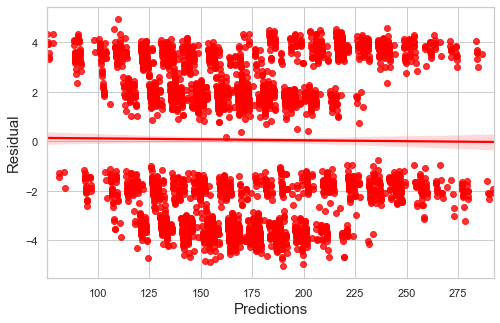

In [47]:
# Run statsmodel function
model_sm, arr_sm = get_sm_model(y_train,X_train, X_test);
# Run sklearn model
model, arr, intercept = get_sk_model(y_train,X_train, X_test);
# Run AUC
#roc(model, X_test, y_test);

In [48]:
data.columns

Index(['State', 'Population', 'Area', 'Children', 'Age', 'Income', 'Marital',
       'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet',
       'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'Timely_response', 'Timely_fixes',
       'Timely_replacements', 'Reliability', 'Options', 'Respectful_response',
       'Courteous_exchange', 'Evidence_of_active_listening'],
      dtype='object')

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 8.120e+04
Date:                Wed, 13 Jan 2021   Prob (F-statistic):               0.00
Time:                        00:17:40   Log-Likelihood:                -17341.
No. Observations:                7000   AIC:                         3.472e+04
Df Residuals:                    6980   BIC:                         3.486e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

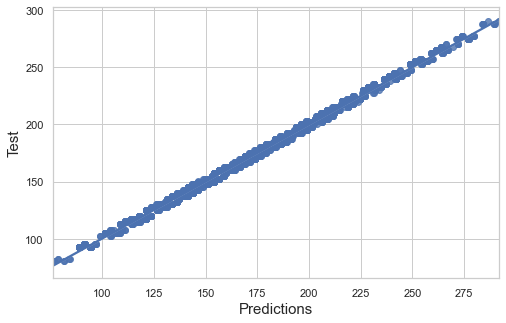


Printing model coefficients and intercept summary for sklearn model:
 [['Children' '-9.518285541219331']
 ['Age' '1.0139470305144753']
 ['Tenure' '-25.351687684442204']
 ['Bandwidth_GB_Year' '0.30945660964575183']
 ['Timely_response' '0.08134367699281429']
 ['Churn_Yes' '0.377431929133828']
 ['Gender_Male' '-20.106951219617063']
 ['Gender_Nonbinary' '6.448515018453459']
 ['InternetService_Fiber_Optic' '148.14864194848738']
 ['InternetService_None' '115.29488676811226']
 ['Multiple_Yes' '10.172061565816486']
 ['OnlineSecurity_Yes' '-20.75876310028828']
 ['OnlineBackup_Yes' '-6.56275163284891']
 ['DeviceProtection_Yes' '-13.790346426409995']
 ['TechSupport_Yes' '11.180504693745663']
 ['StreamingTV_Yes' '-28.48854208720322']
 ['StreamingMovies_Yes' '-12.783535099004112']
 ['Contract_One_year' '0.16623093736534786']
 ['Contract_Two_Year' '0.1341381551424302']] -88.89945548393115

Printing predicted and actual values from sklearn:
 [[195.84766769 197.4876    ]
 [141.43481286 144.960655  ]


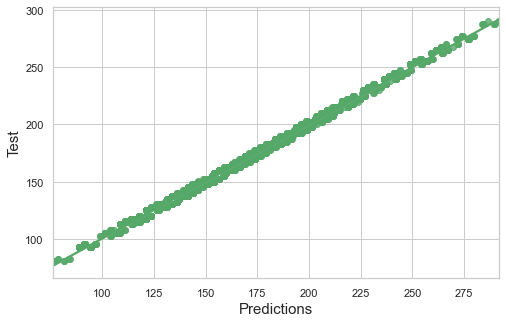

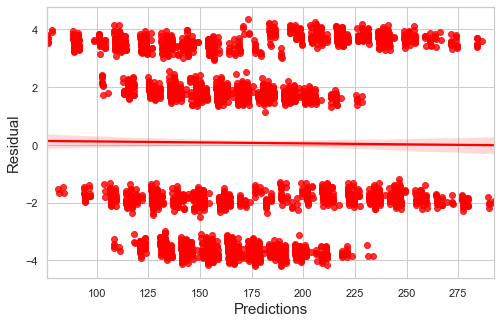

In [49]:
data_reduced = data[[ 'Children', 'Age', 'Gender', 'Churn',
       'InternetService', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Tenure', 'Bandwidth_GB_Year',
       'MonthlyCharge',  'Timely_response','Contract' ]]

dummy_variable_columns = [
                          'Churn','Gender', 'InternetService', 'Multiple','OnlineSecurity','OnlineBackup',
                          'DeviceProtection','TechSupport', 'StreamingTV','StreamingMovies','Contract'
                         ]


data_diff = [i for i in data.columns.tolist() + data_reduced.columns.tolist() if i not in data.columns.tolist() or i not in data_reduced.columns.tolist()]

y, dummy_data_reduced = get_dummy_data_with_output(dummy_variable_columns, data_reduced)
X_train, X_test, y_train, y_test = train_test_split(dummy_data_reduced,y,test_size=.3, random_state=0)
# Run statsmodel on reduced data set
get_sm_model(y_train,X_train, X_test);
# Run sklearn model on reduced data set
model, arr, intercept = get_sk_model(y_train,X_train, X_test);


In [50]:
data_reduced.columns

Index(['Children', 'Age', 'Gender', 'Churn', 'InternetService', 'Multiple',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Tenure', 'Bandwidth_GB_Year',
       'MonthlyCharge', 'Timely_response', 'Contract'],
      dtype='object')

In [51]:
data_diff

['State',
 'Population',
 'Area',
 'Income',
 'Marital',
 'Outage_sec_perweek',
 'Email',
 'Contacts',
 'Yearly_equip_failure',
 'Techie',
 'Port_modem',
 'Tablet',
 'Phone',
 'PaperlessBilling',
 'PaymentMethod',
 'Timely_fixes',
 'Timely_replacements',
 'Reliability',
 'Options',
 'Respectful_response',
 'Courteous_exchange',
 'Evidence_of_active_listening']

In [52]:
equation = 'y = '
for ar in arr:
    eq = str(round(float(ar[1]),3))+' x '+str(ar[0])
    if eq.startswith('-'):
        equation = equation + ' ' + eq
    else:
        equation = equation + ' + ' +eq
    
print (equation + ' ' + str(intercept))

y =  -9.518 x Children + 1.014 x Age -25.352 x Tenure + 0.309 x Bandwidth_GB_Year + 0.081 x Timely_response + 0.377 x Churn_Yes -20.107 x Gender_Male + 6.449 x Gender_Nonbinary + 148.149 x InternetService_Fiber_Optic + 115.295 x InternetService_None + 10.172 x Multiple_Yes -20.759 x OnlineSecurity_Yes -6.563 x OnlineBackup_Yes -13.79 x DeviceProtection_Yes + 11.181 x TechSupport_Yes -28.489 x StreamingTV_Yes -12.784 x StreamingMovies_Yes + 0.166 x Contract_One_year + 0.134 x Contract_Two_Year -88.89945548393115
